# NetworkX GUGA DiGraph

- We use the drt to generate a GUGA graph for all possible nodes for a give number of spatial orbitals


In [32]:
from pyguga.graph import DistinctRowTable
n_spat_orbs = 4
drt = DistinctRowTable(n_spat_orbs)
df = drt.df

- We can build a graph from the dataframe

In [33]:
from pyguga.graph import nx_build_graph, n_paths_to_node
graph = nx_build_graph(df)

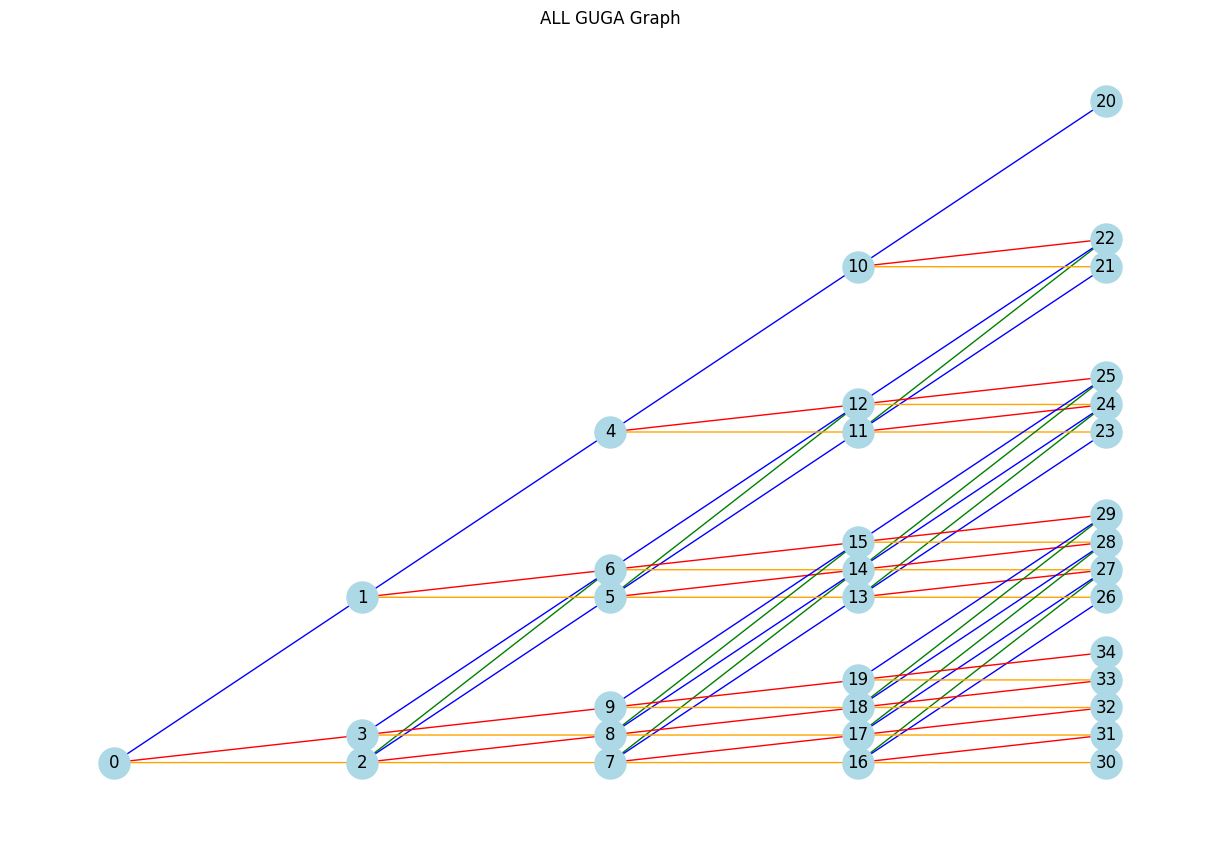

In [34]:
from pyguga.graph import nx_draw
nx_draw(graph)

- Using the digraph structure we can calculate the number of paths to each node from the initial node

In [35]:
n_paths_to_node(graph, 29)

10

- Getting all the nodes at the head orbital level

In [36]:
orbital_level = n_spat_orbs
df_u = drt.df_orbital_level(4)
df_u

,a,b,c,u,uirrep,k0,k1,k2,k3,l0,l1,l2,l3
20,4,0,0,4,6,None,None,None,10,None,None,None,None
21,3,1,0,4,7,None,10,None,11,None,None,None,None
22,3,0,1,4,8,10,None,11,12,None,None,None,None
23,2,2,0,4,9,None,11,None,13,None,None,None,None
24,2,1,1,4,10,11,12,13,14,None,None,None,None
25,2,0,2,4,1,12,None,14,15,None,None,None,None
26,1,3,0,4,2,None,13,None,16,None,None,None,None
27,1,2,1,4,3,13,14,16,17,None,None,None,None
28,1,1,2,4,4,14,15,17,18,None,None,None,None
29,1,0,3,4,5,15,None,18,19,None,None,None,None


- The spin $S_z$ multiplicity is given by $2S + 1$, where $b = 2S$, therefore $S_z$ multiplicity $ = b +1$

In [37]:
spin_multiplicity = df_u['b'] +1
spin_multiplicity

20    1
21    2
22    1
23    3
24    2
25    1
26    4
27    3
28    2
29    1
30    5
31    4
32    3
33    2
34    1
Name: b, dtype: int64

- We can calculate the number of paths to each node

In [23]:
node_path_list = {j:n_paths_to_node(graph,j) for j in df_u.index}
node_path_list

{20: 1,
 21: 4,
 22: 10,
 23: 6,
 24: 20,
 25: 20,
 26: 4,
 27: 15,
 28: 20,
 29: 10,
 30: 1,
 31: 4,
 32: 6,
 33: 4,
 34: 1}

- We can calculate the number $S_z$ spin muliplicities

In [39]:
spin_multiplicity_node_path_list = {j:spin_multiplicity[j]*node_path_list[j] for j in df_u.index}
spin_multiplicity_node_path_list

{20: np.int64(1),
 21: np.int64(8),
 22: np.int64(10),
 23: np.int64(18),
 24: np.int64(40),
 25: np.int64(20),
 26: np.int64(16),
 27: np.int64(45),
 28: np.int64(40),
 29: np.int64(10),
 30: np.int64(5),
 31: np.int64(16),
 32: np.int64(18),
 33: np.int64(8),
 34: np.int64(1)}

- The sum of these should be the dimension of the Full fermionic fock space across al particle numbers

In [30]:
fermionic_fock_space_dim = sum(spin_multiplicity_node_path_list.values())

- Which should have a dimension of $2^{2*N_{spatial}}$

In [31]:
assert (fermionic_fock_space_dim == 2**(2*n_spat_orbs))